# Netflix Stock Analysis Project

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [19]:
df = pd.read_csv("netflix.csv")
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429
...,...,...,...,...,...,...,...
4851,2021-08-30,567.159973,556.450012,557.250000,566.179993,2434800.0,566.179993
4852,2021-08-31,569.479980,561.609985,566.119995,569.190002,2431900.0,569.190002
4853,2021-09-01,591.000000,569.000000,569.000000,582.070007,5626200.0,582.070007
4854,2021-09-02,598.760010,583.679993,583.679993,588.549988,6179900.0,588.549988


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4856 entries, 0 to 4855
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4856 non-null   object 
 1   High       4856 non-null   float64
 2   Low        4856 non-null   float64
 3   Open       4856 non-null   float64
 4   Close      4856 non-null   float64
 5   Volume     4856 non-null   float64
 6   Adj Close  4856 non-null   float64
dtypes: float64(6), object(1)
memory usage: 265.7+ KB


In [21]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4856.000000,4856.000000,4856.000000,4856.000000,4.856000e+03,4856.000000
mean,104.417595,101.223064,102.841799,102.882117,1.686502e+07,102.882117
std,155.588870,151.003701,153.329766,153.379795,1.939578e+07,153.379795
min,0.410714,0.346429,0.377857,0.372857,2.856000e+05,0.372857
25%,3.971072,3.830357,3.892857,3.893929,6.333750e+06,3.893929
50%,20.756429,20.010715,20.446428,20.429286,1.089410e+07,20.429286
75%,125.750000,122.302502,124.007502,123.742502,2.021828e+07,123.742502
max,598.760010,583.679993,585.799988,589.520081,3.234140e+08,589.520081


In [22]:
sns.set(rc={'figure.figsize':(10,5)})

In [23]:
df["Date"]=pd.to_datetime(df["Date"])
df =df.set_index("Date")
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429


## Volume of stock vs time

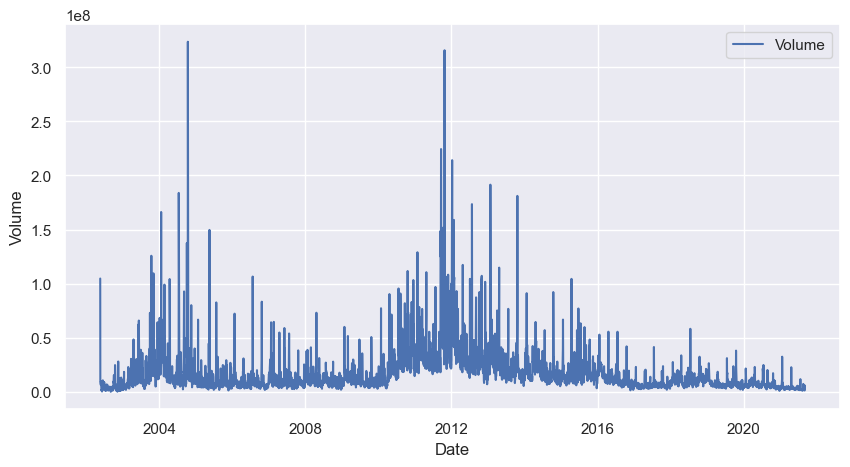

In [24]:
sns.lineplot(x=df.index,y=df["Volume"],label="Volume")
plt.title= "Volume of Stock versus Time"
plt.show()

## Netflix Stock price-High,Open and Close

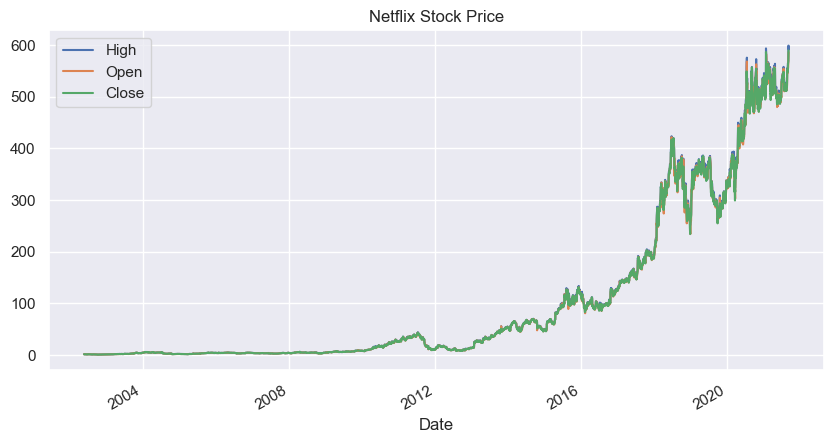

In [25]:
df.plot(y=["High","Open","Close"],title="Netflix Stock Price")
plt.show()

## Netflix Stock Price-Day,Month,Year wise

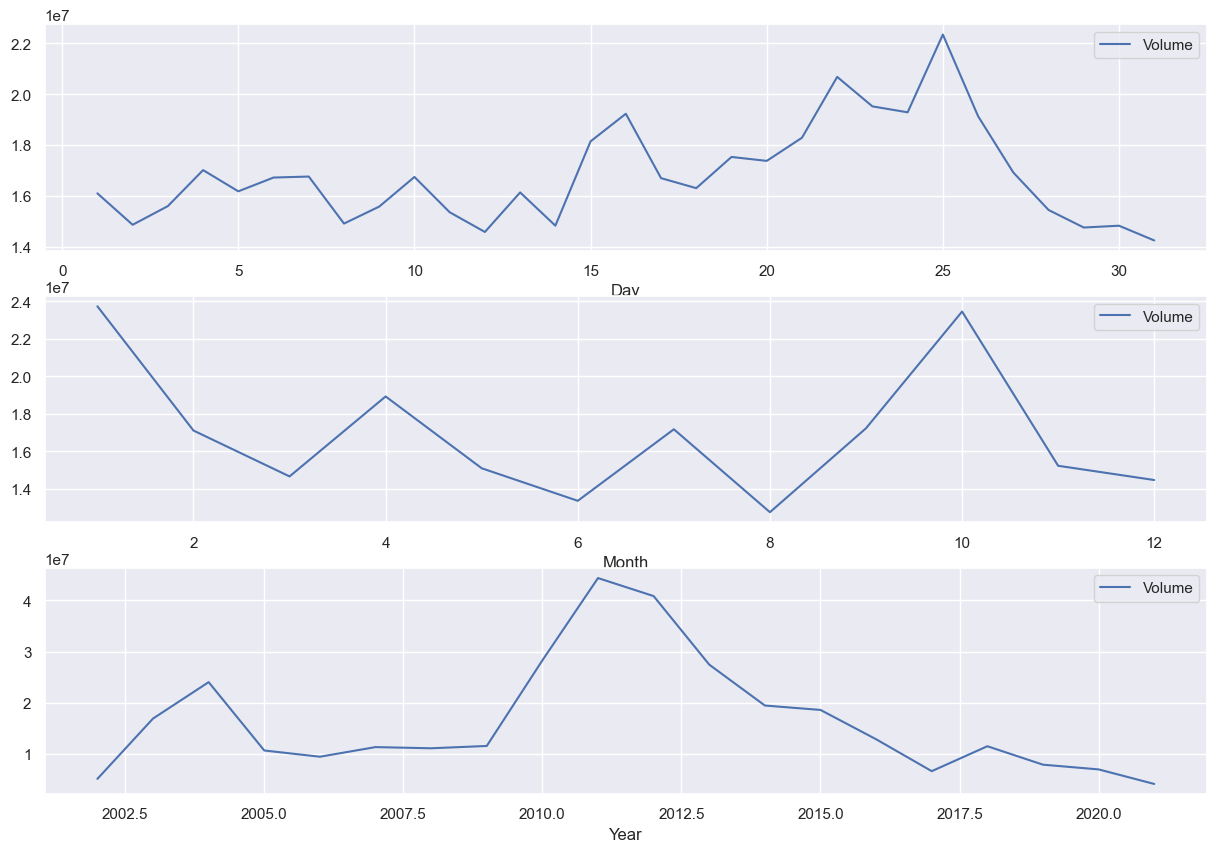

In [26]:
fig, (axs1,axs2,axs3) = plt.subplots(3 , figsize=(15,10))
df.groupby(df.index.day).mean().plot(y="Volume", ax=axs1,xlabel="Day")
df.groupby(df.index.month).mean().plot(y="Volume", ax=axs2,xlabel="Month")
df.groupby(df.index.year).mean().plot(y="Volume",ax=axs3,xlabel="Year")
plt.show()

## Top 5 Dates with highest stock price

In [27]:
highest = df.sort_values(by="High", ascending=False)
highest["High"].head()

Date
2021-09-02    598.760010
2021-01-20    593.289978
2021-09-03    591.685120
2021-09-01    591.000000
2021-01-21    588.750000
Name: High, dtype: float64

## Top 5 dates with Lowest stock price

In [28]:
lowest = df.sort_values(by="Low",ascending=True)
lowest["Low"].head(5)

Date
2002-10-10    0.346429
2002-10-09    0.347143
2002-10-07    0.382143
2002-10-08    0.390714
2002-10-16    0.442857
Name: Low, dtype: float64

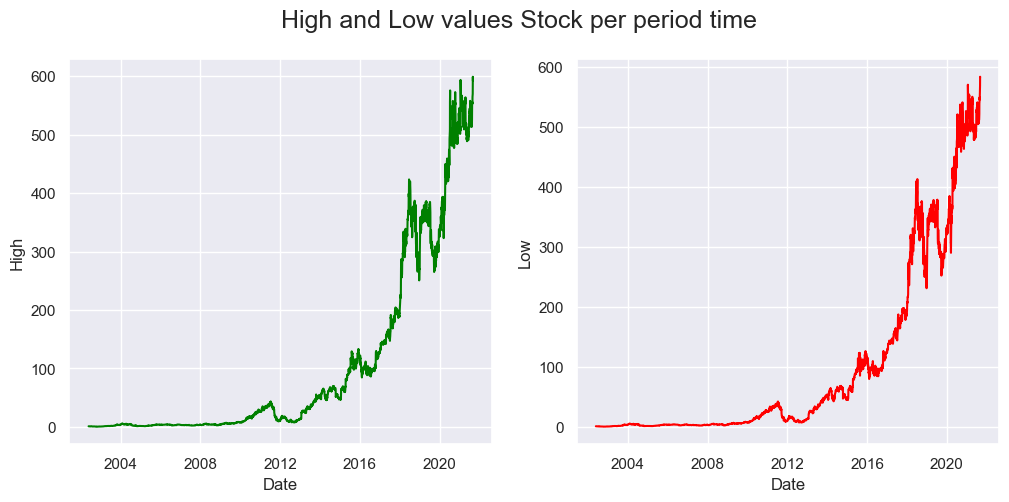

In [29]:
fig,axes=plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(12,5))
fig.suptitle("High and Low values Stock per period time",fontsize=18)
sns.lineplot(ax=axes[0],y=df["High"],x=df.index,color='green')
sns.lineplot(ax=axes[1],y=df["Low"],x=df.index,color='red')
plt.show()